#**Crop Yield Recommendation**

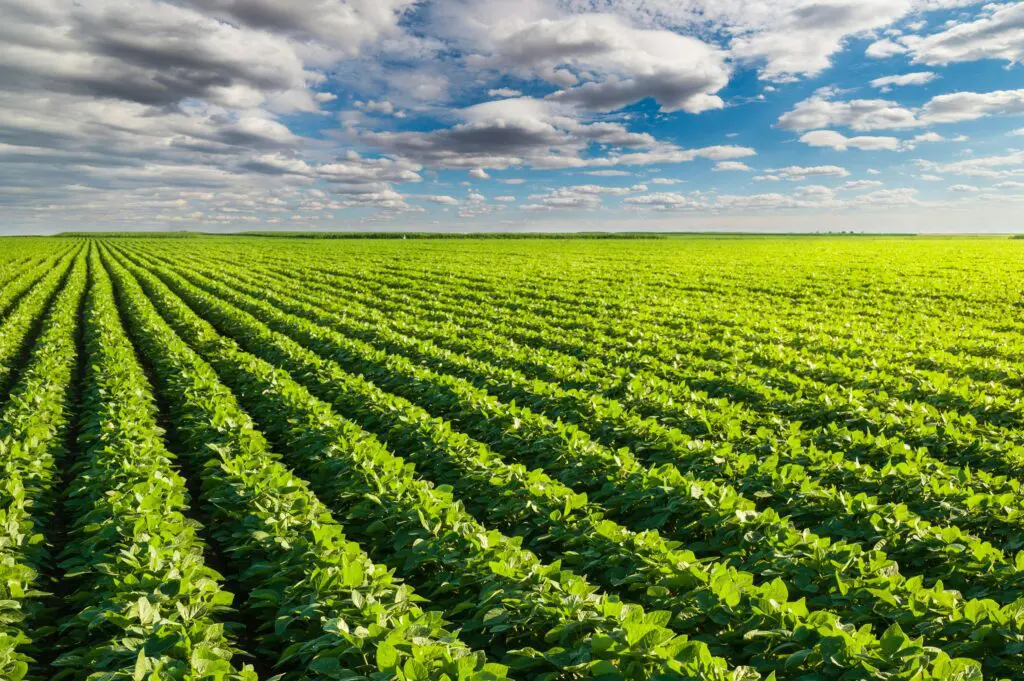

#**Introduction**
Agriculture plays a vital role in economic growth and food security. However, crop productivity is highly dependent on several environmental and farming factors such as climate conditions, soil quality, and agricultural inputs. This project focuses on analyzing historical crop data to understand how these factors affect crop yield. By studying patterns in agricultural data, the project aims to support better decision-making for farmers and agricultural planners, ultimately improving productivity and sustainability.

#**Project Objectives**
1.To analyze the impact of environmental and agricultural factors (such as rainfall, temperature, and cultivated area) on crop yield.

2.To develop a predictive understanding of crop yield trends that can assist farmers in planning and optimizing agricultural practices.

#**Project Aim**
The main aim of this project is to predict and improve crop yield by analyzing key agricultural and climatic variables, enabling data-driven decision-making for sustainable and efficient farming.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_excel('Crop Yield.xls')
df

Crop  Crop_Year       Season     State     Area  Production  \
0          Arecanut       1997  Whole Year      Assam  73814.0       56708   
1         Arhar/Tur       1997  Kharif          Assam   6637.0        4685   
2       Castor seed       1997  Kharif          Assam    796.0          22   
3          Coconut        1997  Whole Year      Assam  19656.0   126905000   
4      Cotton(lint)       1997  Kharif          Assam   1739.0         794   
...             ...        ...          ...       ...      ...         ...   
16378          Jute       2018  Kharif       Nagaland   3080.0        5870   
16379       Linseed       2018  Rabi         Nagaland   5850.0        4760   
16380         Maize       2018  Kharif       Nagaland  63710.0      126270   
16381         Maize       2018  Rabi         Nagaland   5360.0       10630   
16382        Masoor       2018  Rabi         Nagaland   2180.0        1790   

       Annual_Rainfall   Fertilizer  Pesticide        Yield  
0               2051.4   7024878.38   22882.34     0.796087  
1               2051.4    631643.29    2057.47     0.710435  
2               2051.4     75755.32     246.76     0.238333  
3               2051.4   1870661.52    6093.36  5238.051739  
4               2051.4    165500.63     539.09     0.420909  
...                ...          ...        ...          ...  
16378           1372.7    499576.00    1078.00     1.902500  
16379           1372.7    948870.00    2047.50     0.810909  
16380           1372.7  10333762.00   22298.50     1.981818  
16381           1372.7    869392.00    1876.00     1.983333  
16382           1372.7    353596.00     763.00     0.822222  

[16383 rows x 10 columns]

**Crop** – Indicates the type of crop cultivated (e.g., rice, wheat, maize).

**Crop_Year** – Represents the year in which the crop was grown and harvested.

**Season** – Specifies the agricultural season during which the crop was cultivated (e.g., Kharif, Rabi).

**State** – Denotes the geographical region or state where the crop was grown.

**Area** – Refers to the total land area used for cultivation, usually measured in hectares.

**Production** – Represents the total quantity of crop produced, typically measured in tonnes.

**Annual_Rainfall** – Indicates the total rainfall received in a year, measured in millimeters.

**Fertilizer** – Shows the amount of fertilizer applied to the crop during cultivation.

**Pesticide** – Represents the quantity of pesticide used to protect crops from pests.

**Yield** – Indicates the crop output per unit area, serving as the target variable of the dataset.

In [3]:
df.shape

(16383, 10)

In [4]:
df.head()

Crop  Crop_Year       Season  State     Area  Production  \
0      Arecanut       1997  Whole Year   Assam  73814.0       56708   
1     Arhar/Tur       1997  Kharif       Assam   6637.0        4685   
2   Castor seed       1997  Kharif       Assam    796.0          22   
3      Coconut        1997  Whole Year   Assam  19656.0   126905000   
4  Cotton(lint)       1997  Kharif       Assam   1739.0         794   

   Annual_Rainfall  Fertilizer  Pesticide        Yield  
0           2051.4  7024878.38   22882.34     0.796087  
1           2051.4   631643.29    2057.47     0.710435  
2           2051.4    75755.32     246.76     0.238333  
3           2051.4  1870661.52    6093.36  5238.051739  
4           2051.4   165500.63     539.09     0.420909

In [5]:
df.tail()

Crop  Crop_Year       Season     State     Area  Production  \
16378     Jute       2018  Kharif       Nagaland   3080.0        5870   
16379  Linseed       2018  Rabi         Nagaland   5850.0        4760   
16380    Maize       2018  Kharif       Nagaland  63710.0      126270   
16381    Maize       2018  Rabi         Nagaland   5360.0       10630   
16382   Masoor       2018  Rabi         Nagaland   2180.0        1790   

       Annual_Rainfall  Fertilizer  Pesticide     Yield  
16378           1372.7    499576.0     1078.0  1.902500  
16379           1372.7    948870.0     2047.5  0.810909  
16380           1372.7  10333762.0    22298.5  1.981818  
16381           1372.7    869392.0     1876.0  1.983333  
16382           1372.7    353596.0      763.0  0.822222

In [6]:
df.columns

Index(['Crop', 'Crop_Year', 'Season', 'State', 'Area', 'Production',
       'Annual_Rainfall', 'Fertilizer', 'Pesticide', 'Yield'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16383 entries, 0 to 16382
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Crop             16383 non-null  object 
 1   Crop_Year        16383 non-null  int64  
 2   Season           16383 non-null  object 
 3   State            16383 non-null  object 
 4   Area             16383 non-null  float64
 5   Production       16383 non-null  int64  
 6   Annual_Rainfall  16383 non-null  float64
 7   Fertilizer       16383 non-null  float64
 8   Pesticide        16383 non-null  float64
 9   Yield            16383 non-null  float64
dtypes: float64(5), int64(2), object(3)
memory usage: 1.3+ MB


In [8]:
df.describe().T

count          mean           std      min         25%  \
Crop_Year        16383.0  2.008756e+03  6.268381e+00  1997.00    2003.000   
Area             16383.0  1.927051e+05  7.529802e+05     0.80    1763.500   
Production       16383.0  1.955316e+07  2.882289e+08     0.00    1683.000   
Annual_Rainfall  16383.0  1.416101e+03  8.393694e+02   301.30     926.500   
Fertilizer       16383.0  2.551025e+07  9.544373e+07    94.67  235187.220   
Pesticide        16383.0  5.148133e+04  2.168303e+05     0.09     448.585   
Yield            16383.0  8.821069e+01  9.224133e+02     0.00       0.595   

                          50%           75%           max  
Crop_Year        2.009000e+03  2.014000e+03  2.019000e+03  
Area             1.162600e+04  9.193750e+04  5.080810e+07  
Production       1.719900e+04  1.466405e+05  6.326000e+09  
Annual_Rainfall  1.207000e+03  1.610300e+03  6.552700e+03  
Fertilizer       1.531371e+06  1.187437e+07  4.835407e+09  
Pesticide        2.984100e+03  2.337390e+04  1.575051e+07  
Yield            1.028182e+00  2.437500e+00  2.110500e+04

In [9]:
df.dtypes

Crop                object
Crop_Year            int64
Season              object
State               object
Area               float64
Production           int64
Annual_Rainfall    float64
Fertilizer         float64
Pesticide          float64
Yield              float64
dtype: object

In [10]:
num_data=df.select_dtypes(include=["float64","int64"])
print("numerical colums",num_data.columns)

numerical colums Index(['Crop_Year', 'Area', 'Production', 'Annual_Rainfall', 'Fertilizer',
       'Pesticide', 'Yield'],
      dtype='object')


In [11]:
cat_data=df.select_dtypes(include=["O"])
print("categorical colums",cat_data.columns)

categorical colums Index(['Crop', 'Season', 'State'], dtype='object')


In [12]:
for i in cat_data:
    print(i,df[i].unique())
    print(df[i].value_counts())
    print("**********************")

Crop ['Arecanut' 'Arhar/Tur' 'Castor seed' 'Coconut ' 'Cotton(lint)'
 'Dry chillies' 'Gram' 'Jute' 'Linseed' 'Maize' 'Mesta' 'Niger seed'
 'Onion' 'Other  Rabi pulses' 'Potato' 'Rapeseed &Mustard' 'Rice'
 'Sesamum' 'Small millets' 'Sugarcane' 'Sweet potato' 'Tapioca' 'Tobacco'
 'Turmeric' 'Wheat' 'Bajra' 'Black pepper' 'Cardamom' 'Coriander' 'Garlic'
 'Ginger' 'Groundnut' 'Horse-gram' 'Jowar' 'Ragi' 'Cashewnut' 'Banana'
 'Soyabean' 'Barley' 'Khesari' 'Masoor' 'Moong(Green Gram)'
 'Other Kharif pulses' 'Safflower' 'Sannhamp' 'Sunflower' 'Urad'
 'Peas & beans (Pulses)' 'other oilseeds' 'Other Cereals' 'Cowpea(Lobia)'
 'Oilseeds total' 'Guar seed' 'Other Summer Pulses' 'Moth']
Crop
Rice                     944
Maize                    752
Moong(Green Gram)        607
Groundnut                595
Urad                     583
Sesamum                  553
Potato                   494
Arhar/Tur                480
Sugarcane                474
Jowar                    453
Bajra                 

In [13]:
!pip install ydata-profiling

In [14]:
import ydata_profiling as pp
pp.ProfileReport(df)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 10/10 [00:00<00:00, 13.40it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

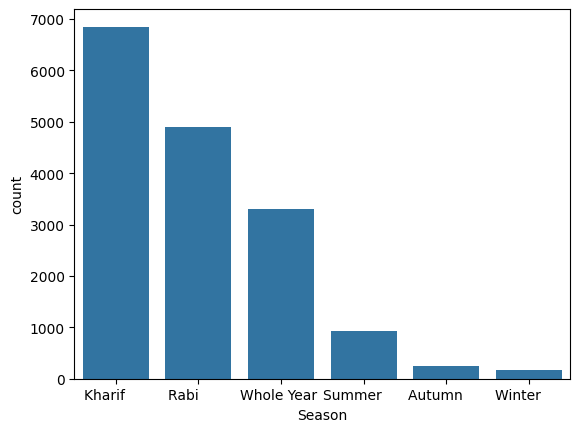

In [15]:
sns.barplot(x=df.Season.value_counts().index,y=df.Season.value_counts())
plt.show()

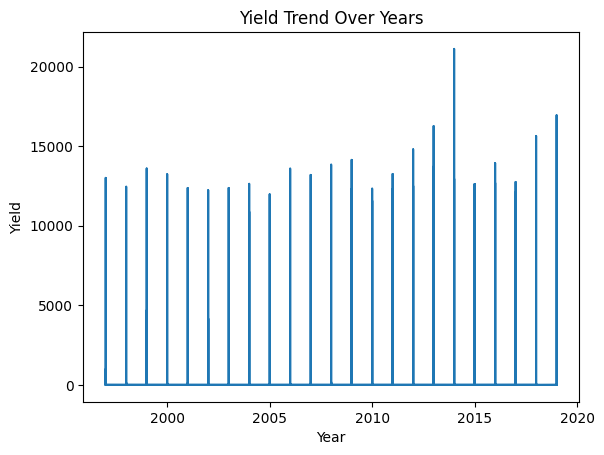

In [16]:
plt.plot(df['Crop_Year'], df['Yield'])
plt.xlabel('Year')
plt.ylabel('Yield')
plt.title('Yield Trend Over Years')
plt.show()


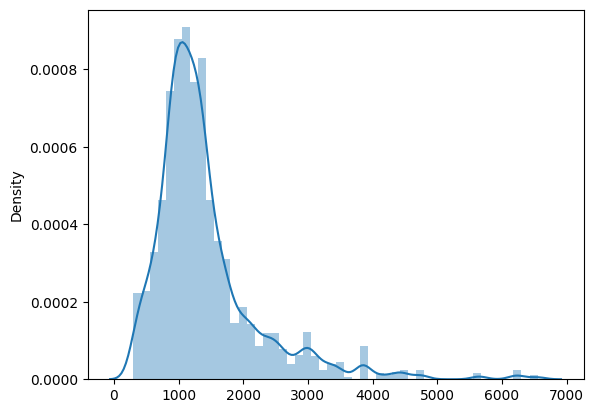

In [17]:
sns.distplot(x=df['Annual_Rainfall'])
plt.show()

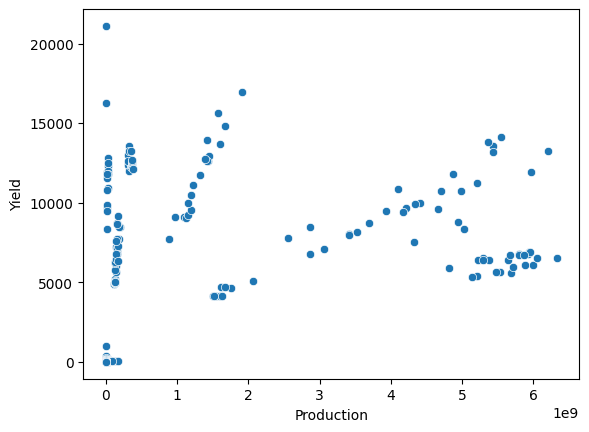

In [18]:
sns.scatterplot(x=df['Production'],y=df['Yield'])
plt.show()

#**Data Preprocessing**

In [21]:
df.isnull().sum()

Crop               0
Crop_Year          0
Season             0
State              0
Area               0
Production         0
Annual_Rainfall    0
Fertilizer         0
Pesticide          0
Yield              0
dtype: int64

#**Converting categorical columns to numerical columns**

In [24]:
cat_data.columns

Index(['Crop', 'Season', 'State'], dtype='object')

In [25]:
from sklearn.preprocessing import LabelEncoder
lc=LabelEncoder()
df.Crop=lc.fit_transform(df.Crop)
df.Season=lc.fit_transform(df.Season)
df.State=lc.fit_transform(df.State)

In [26]:
df

Crop  Crop_Year  Season  State     Area  Production  Annual_Rainfall  \
0         0       1997       4      2  73814.0       56708           2051.4   
1         1       1997       1      2   6637.0        4685           2051.4   
2         8       1997       1      2    796.0          22           2051.4   
3         9       1997       4      2  19656.0   126905000           2051.4   
4        11       1997       1      2   1739.0         794           2051.4   
...     ...        ...     ...    ...      ...         ...              ...   
16378    21       2018       1     19   3080.0        5870           1372.7   
16379    23       2018       2     19   5850.0        4760           1372.7   
16380    24       2018       1     19  63710.0      126270           1372.7   
16381    24       2018       2     19   5360.0       10630           1372.7   
16382    25       2018       2     19   2180.0        1790           1372.7   

        Fertilizer  Pesticide        Yield  
0       7024878.38   22882.34     0.796087  
1        631643.29    2057.47     0.710435  
2         75755.32     246.76     0.238333  
3       1870661.52    6093.36  5238.051739  
4        165500.63     539.09     0.420909  
...            ...        ...          ...  
16378    499576.00    1078.00     1.902500  
16379    948870.00    2047.50     0.810909  
16380  10333762.00   22298.50     1.981818  
16381    869392.00    1876.00     1.983333  
16382    353596.00     763.00     0.822222  

[16383 rows x 10 columns]

#**Feature Engineering**

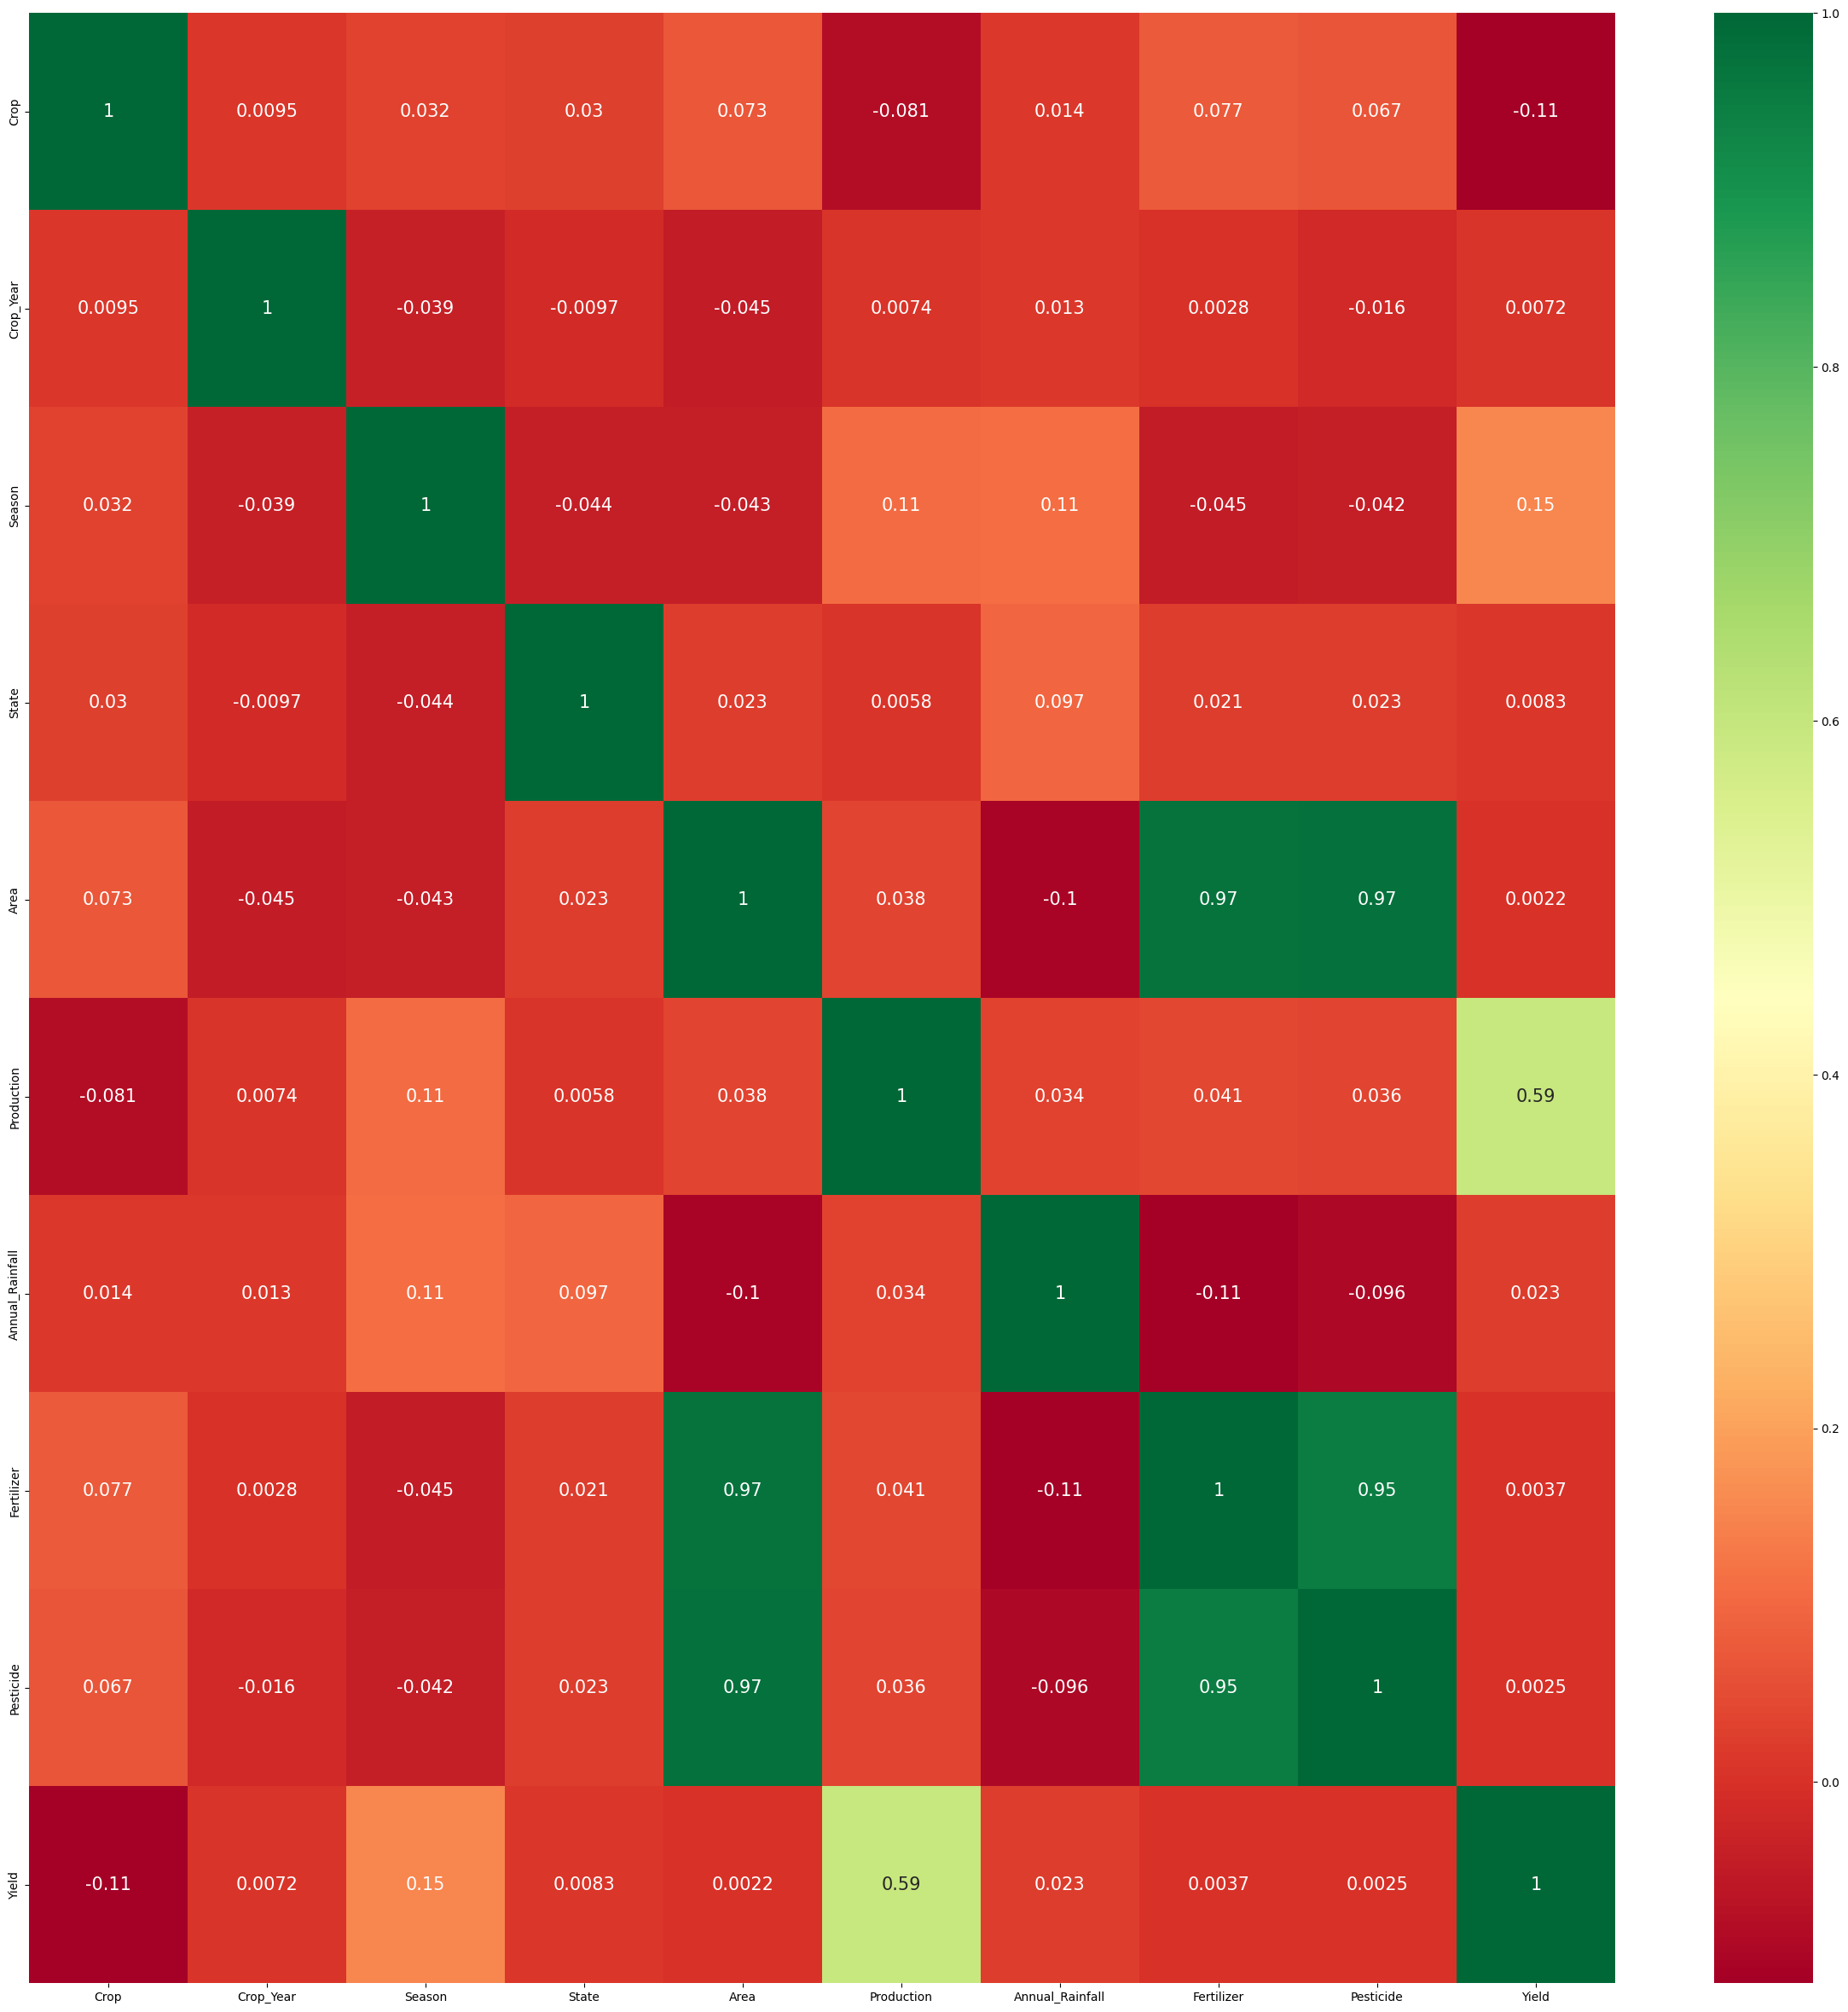

In [27]:
plt.figure(figsize=(30, 30))
sns.heatmap(df.corr(), annot=True, cmap="RdYlGn", annot_kws={"size":15})
plt.show()

#**Removing unwanted column**

In [28]:
df.columns

Index(['Crop', 'Crop_Year', 'Season', 'State', 'Area', 'Production',
       'Annual_Rainfall', 'Fertilizer', 'Pesticide', 'Yield'],
      dtype='object')

In [30]:
df.drop(['Crop_Year'], axis="columns", inplace=True)

In [31]:
df

Crop  Season  State     Area  Production  Annual_Rainfall   Fertilizer  \
0         0       4      2  73814.0       56708           2051.4   7024878.38   
1         1       1      2   6637.0        4685           2051.4    631643.29   
2         8       1      2    796.0          22           2051.4     75755.32   
3         9       4      2  19656.0   126905000           2051.4   1870661.52   
4        11       1      2   1739.0         794           2051.4    165500.63   
...     ...     ...    ...      ...         ...              ...          ...   
16378    21       1     19   3080.0        5870           1372.7    499576.00   
16379    23       2     19   5850.0        4760           1372.7    948870.00   
16380    24       1     19  63710.0      126270           1372.7  10333762.00   
16381    24       2     19   5360.0       10630           1372.7    869392.00   
16382    25       2     19   2180.0        1790           1372.7    353596.00   

       Pesticide        Yield  
0       22882.34     0.796087  
1        2057.47     0.710435  
2         246.76     0.238333  
3        6093.36  5238.051739  
4         539.09     0.420909  
...          ...          ...  
16378    1078.00     1.902500  
16379    2047.50     0.810909  
16380   22298.50     1.981818  
16381    1876.00     1.983333  
16382     763.00     0.822222  

[16383 rows x 9 columns]

#**Model Building**

In [32]:
## Split data into x and y
x = df.drop('Yield', axis=1)
y = df.Yield

In [33]:
## training and testing data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)

In [34]:
x_train

Crop  Season  State       Area  Production  Annual_Rainfall  \
7712     36       1     18      100.9         161           2406.4   
763       7       4      0   147370.0       38729            928.4   
15783     4       2     22     7700.0       29900            497.5   
8955     40       1      4  3843825.0     4586818           1122.8   
8101     44       1     12    54492.0       30611            860.8   
...     ...     ...    ...        ...         ...              ...   
13418    17       2     24   188660.0      323072           1348.7   
5390     31       2     23    16518.0      153558            970.9   
860       8       1     12    21799.0       16137           1002.9   
15795    43       1     22     2700.0         900            497.5   
7270     40       1     18    51839.0      103673           2834.3   

         Fertilizer   Pesticide  
7712   1.030492e+04      26.234  
763    1.505090e+07   38316.200  
15783  1.212288e+06    2926.000  
8955   4.164400e+08  807203.250  
8101   5.158758e+06   13623.000  
...             ...         ...  
13418  2.725948e+07   50938.200  
5390   2.600594e+06    6276.840  
860    2.226332e+06    5667.740  
15795  4.250880e+05    1026.000  
7270   5.089035e+06   13478.140  

[13106 rows x 8 columns]

In [35]:
y_train

7712     1.530000
763      0.236000
15783    3.723077
8955     1.160625
8101     0.561905
           ...   
13418    1.644444
5390     9.684074
860      0.704000
15795    0.292222
7270     1.887500
Name: Yield, Length: 13106, dtype: float64

In [36]:
x_test

Crop  Season  State       Area  Production  Annual_Rainfall  \
9858     37       4     14   48540.00      648203           1072.3   
2932      2       1     12  304229.00      130201           1321.0   
12843    47       1     19     260.00         210           1296.6   
5156     31       3     21       1.00           5           1582.4   
2677     33       1     13     371.00         290           2524.8   
...     ...     ...    ...        ...         ...              ...   
9927     40       2     19    1000.00        1600           1362.5   
9608      1       1     27    1612.00         880           1353.3   
8526     37       2     11    9350.04       73414           1258.3   
5359     53       4     13       1.00           1           2664.8   
14133     8       1     28      81.00          48           1483.5   

         Fertilizer   Pesticide  
9858   6.199043e+06  10678.8000  
2932   4.740496e+07  51718.9300  
12843  3.920800e+04     80.6000  
5156   1.574400e+02      0.3800  
2677   5.306784e+04     33.3900  
...             ...         ...  
9927   1.277100e+05    220.0000  
9608   1.933110e+05    338.5200  
8526   9.254670e+05   2244.0096  
5359   1.574400e+02      0.3800  
14133  1.222776e+04     26.7300  

[3277 rows x 8 columns]

In [37]:
y_test

9858     12.951277
2932      0.446667
12843     0.751667
5156      5.000000
2677      0.910000
           ...    
9927      1.605000
9608      0.590000
8526      6.986250
5359      1.000000
14133     0.590000
Name: Yield, Length: 3277, dtype: float64

In [39]:

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

linear_regressor = LinearRegression()
linear_regressor.fit(x_train, y_train)

y_pred = linear_regressor.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

r2 = r2_score(y_test, y_pred)
print("R-squared (R2) score:", r2)


Mean Squared Error: 228888.5919751802
R-squared (R2) score: 0.4928625409363435


In [40]:

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

model = RandomForestRegressor()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)


mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)


r2 = r2_score(y_test, y_pred)
print("R-squared (R2) score:", r2)



Mean Squared Error: 8695.158463113414
R-squared (R2) score: 0.9807345550466868


In [41]:

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score


GB = GradientBoostingRegressor(n_estimators=700)
GB.fit(x_train, y_train)

y_pred = GB.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)


r2 = r2_score(y_test, y_pred)
print("R-squared (R2) score:", r2)


Mean Squared Error: 22474.853553575907
R-squared (R2) score: 0.9502035465130381
